In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [3]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_with_patient/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_with_patient/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_with_patient/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_with_patient/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Age_with_patient/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 50) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]

# 
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

df_patient = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

In [5]:
df_CN_filtrado

,Unnamed: 0,Delta_canon_EPP_ORB_left,Delta_canon_EPP_ORB_right,Delta_canon_EPP_IFG_left,Delta_canon_EPP_IFG_right,Delta_canon_EPP_MFG_left,Delta_canon_EPP_MFG_right,Delta_canon_EPP_SFG_left,Delta_canon_EPP_SFG_right,Delta_canon_EPP_HPC_left,...,IAF_OCC_right,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ,ID-unique
0,1,0.054096,0.047097,0.056917,0.044670,0.055201,0.042544,0.048499,0.039344,0.041028,...,11.500000,CUB_123_2_sub-10004,57.0,2.0,13.0,NaN,0.7578,40.70,99.739738,1
1,27,0.040123,0.048480,0.047047,0.092690,0.033214,0.044383,0.037216,0.043145,0.032845,...,9.125000,CUB_123_2_sub-100035,55.0,2.0,13.0,30.0,0.7578,40.70,98.976304,27
2,47,0.059309,0.040455,0.040989,0.039929,0.040812,0.048901,0.044654,0.042213,0.033875,...,8.666667,CUB_123_1_sub-10003,62.0,2.0,14.0,NaN,0.7578,40.70,99.324324,47
3,55,0.037787,0.028286,0.026936,0.029210,0.022287,0.030809,0.026381,0.028117,0.030884,...,8.791667,CUB_123_1_sub-100012,62.0,2.0,13.0,30.0,0.7578,40.70,99.691591,55
4,63,0.015843,0.020785,0.013620,0.015678,0.012296,0.012214,0.014991,0.018343,0.011985,...,9.583333,CUB_58_sub-10005,56.0,2.0,14.0,NaN,0.7578,40.70,99.656632,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,1443,0.032968,0.036678,0.030297,0.035435,0.032923,0.035019,0.033158,0.033050,0.033604,...,9.041667,CHI_TAK_sub-100016,74.0,2.0,12.0,30.0,0.8550,44.92,98.650235,1378
677,1444,0.035464,0.035469,0.035834,0.034404,0.030824,0.030423,0.031417,0.031326,0.038548,...,9.041667,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221,1379
678,1446,0.044759,0.052309,0.042457,0.046901,0.038112,0.037699,0.038526,0.039239,0.049349,...,8.000000,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446,1381
679,1447,0.059905,0.064894,0.052238,0.051449,0.039586,0.041117,0.042107,0.041310,0.050399,...,9.708333,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503,1382


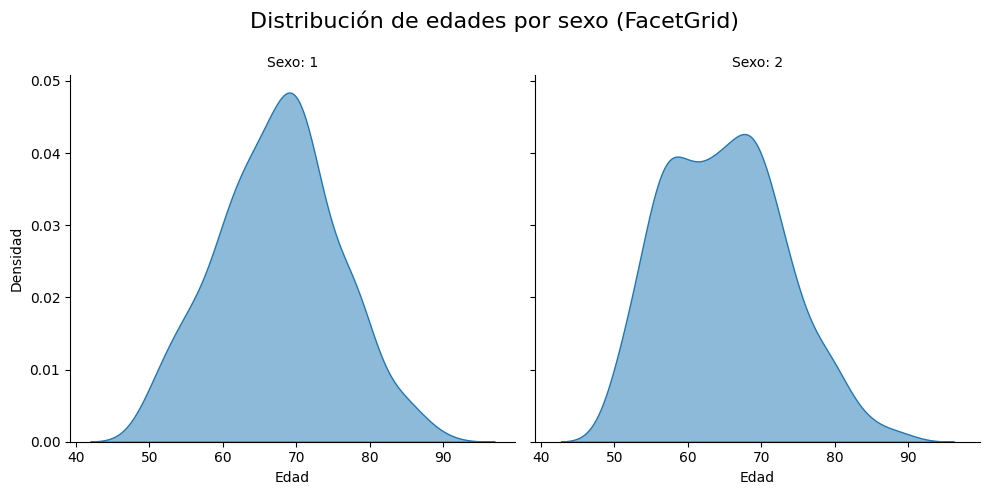

In [14]:
# FacetGrid para la distribución de edades separada por sexo
g = sns.FacetGrid(df_CN_filtrado, col='Sex', height=5, aspect=1, 
                  col_order=[1, 2], palette={1: "blue", 2: "orange"})

# Agregar el KDEplot a cada faceta
g.map(sns.kdeplot, 'Age', fill=True, alpha=0.5)

# Títulos personalizados
g.set_titles("Sexo: {col_name}")
g.set_axis_labels("Edad", "Densidad")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribución de edades por sexo (FacetGrid)', fontsize=16)

# Mostrar el gráfico
plt.show()


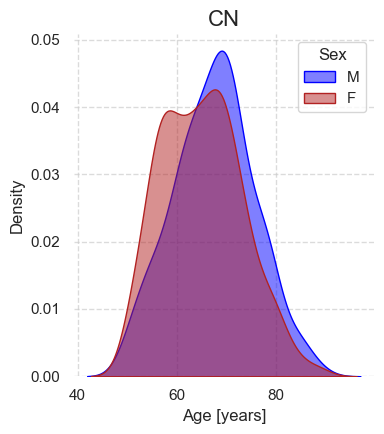

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Establecer el estilo blanco para eliminar bordes
sns.set(style='white')

# Calcular los totales para masculino y femenino
n_masculino = df_CN_filtrado[df_CN_filtrado['Sex'] == 1].shape[0]
n_femenino = df_CN_filtrado[df_CN_filtrado['Sex'] == 2].shape[0]

# Crear el gráfico
plt.figure(figsize=(4, 4.5))
sns.kdeplot(
    data=df_CN_filtrado[df_CN_filtrado['Sex'] == 1],  # Masculino
    x="Age", 
    fill=True,  # Sombrear el área bajo la curva
    color="blue", 
    label="M", 
    alpha=0.5  # Transparencia para superponer mejor
)
sns.kdeplot(
    data=df_CN_filtrado[df_CN_filtrado['Sex'] == 2],  # Femenino
    x="Age", 
    fill=True,  # Sombrear el área bajo la curva
    color="firebrick", 
    label="F ", 
    alpha=0.5  # Transparencia para superponer mejor
)

# Personalización del gráfico
plt.title("CN", fontsize=16)
plt.xlabel("Age [years]", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Sex")
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

# Eliminar los bordes del gráfico
ax = plt.gca()  # Obtener el objeto del gráfico
ax.spines['top'].set_visible(False)    # Eliminar el borde superior
ax.spines['right'].set_visible(False)  # Eliminar el borde derecho
ax.spines['left'].set_visible(False)   # Eliminar el borde izquierdo
ax.spines['bottom'].set_visible(False) # Eliminar el borde inferior



# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Filtrar los datos para masculino y femenino
df_masculino = df_CN_filtrado[df_CN_filtrado['Sex'] == 1]['Age']
df_femenino = df_CN_filtrado[df_CN_filtrado['Sex'] == 2]['Age']

# Calcular las distribuciones suavizadas usando gaussian_kde
kde_masculino = gaussian_kde(df_masculino)
kde_femenino = gaussian_kde(df_femenino)

# Generar un rango de edades (para evaluar la distribución en puntos específicos)
age_range = np.linspace(min(df_CN_filtrado['Age']), max(df_CN_filtrado['Age']), 100)

# Obtener las densidades suavizadas para los valores de edad
density_masculino = kde_masculino(age_range)
density_femenino = kde_femenino(age_range)

# Crear un dataframe para almacenar los datos de las distribuciones
df_densidades = pd.DataFrame({
    'Age': age_range,
    'Density_Masculino': density_masculino,
    'Density_Femenino': density_femenino
})

In [34]:
df_densidades

,Age,Density_Masculino,Density_Femenino
0,50.000000,0.007457,0.010204
1,50.393939,0.008327,0.011685
2,50.787879,0.009207,0.013235
3,51.181818,0.010086,0.014845
4,51.575758,0.010957,0.016509
...,...,...,...
95,87.424242,0.003628,0.001949
96,87.818182,0.003241,0.001799
97,88.212121,0.002870,0.001658
98,88.606061,0.002519,0.001521


In [35]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Filtrar y generar las densidades para cada uno de los dataframes
def generar_densidades(df, nombre_grupo):
    # Filtrar los datos por sexo
    df_masculino = df[df['Sex'] == 1]['Age']
    df_femenino = df[df['Sex'] == 2]['Age']

    # Calcular las distribuciones suavizadas usando gaussian_kde
    kde_masculino = gaussian_kde(df_masculino)
    kde_femenino = gaussian_kde(df_femenino)

    # Generar un rango de edades (para evaluar la distribución en puntos específicos)
    age_range = np.linspace(min(df['Age']), max(df['Age']), 100)

    # Obtener las densidades suavizadas para los valores de edad
    density_masculino = kde_masculino(age_range)
    density_femenino = kde_femenino(age_range)

    # Crear un dataframe para almacenar los datos de las distribuciones
    df_densidades = pd.DataFrame({
        'Age': age_range,
        f'Density_Masculino_{nombre_grupo}': density_masculino,
        f'Density_Femenino_{nombre_grupo}': density_femenino
    })
    
    return df_densidades

# Generar las densidades para cada grupo
df_densidades_CN = generar_densidades(df_CN_filtrado, 'CN')
df_densidades_AD = generar_densidades(df_AD_filtrado, 'AD')
df_densidades_FTD = generar_densidades(df_FTD_filtrado, 'FTD')
df_densidades_MCI = generar_densidades(df_MCI_filtrado, 'MCI')
df_densidades_PD = generar_densidades(df_PD_filtrado, 'PD')

# Guardar los dataframes en archivos CSV (opcional)
df_densidades_CN.to_csv('densidades_CN.csv', index=False)
df_densidades_AD.to_csv('densidades_AD.csv', index=False)
df_densidades_FTD.to_csv('densidades_FTD.csv', index=False)
df_densidades_MCI.to_csv('densidades_MCI.csv', index=False)
df_densidades_PD.to_csv('densidades_PD.csv', index=False)

# Mostrar los primeros registros de cada dataframe de densidades
print("Densidades CN:")
print(df_densidades_CN.head())
print("\nDensidades AD:")
print(df_densidades_AD.head())
print("\nDensidades FTD:")
print(df_densidades_FTD.head())
print("\nDensidades MCI:")
print(df_densidades_MCI.head())
print("\nDensidades PD:")
print(df_densidades_PD.head())


Densidades CN:
         Age  Density_Masculino_CN  Density_Femenino_CN
0  50.000000              0.007457             0.010204
1  50.393939              0.008327             0.011685
2  50.787879              0.009207             0.013235
3  51.181818              0.010086             0.014845
4  51.575758              0.010957             0.016509

Densidades AD:
         Age  Density_Masculino_AD  Density_Femenino_AD
0  50.000000              0.000427             0.000938
1  50.404040              0.000540             0.000971
2  50.808081              0.000671             0.001001
3  51.212121              0.000818             0.001034
4  51.616162              0.000982             0.001077

Densidades FTD:
         Age  Density_Masculino_FTD  Density_Femenino_FTD
0  56.000000               0.021161              0.012889
1  56.313131               0.022338              0.013913
2  56.626263               0.023507              0.014952
3  56.939394               0.024660             

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Filtrar y generar las densidades para cada uno de los dataframes
def generar_densidades(df, nombre_grupo):
    # Filtrar los datos por sexo
    df_masculino = df[df['Sex'] == 1]['Age']
    df_femenino = df[df['Sex'] == 2]['Age']

    # Calcular las distribuciones suavizadas usando gaussian_kde
    kde_masculino = gaussian_kde(df_masculino)
    kde_femenino = gaussian_kde(df_femenino)

    # Generar un rango de edades (para evaluar la distribución en puntos específicos)
    age_range = np.linspace(min(df['Age']), max(df['Age']), 100)

    # Obtener las densidades suavizadas para los valores de edad
    density_masculino = kde_masculino(age_range)
    density_femenino = kde_femenino(age_range)

    # Crear un dataframe para almacenar los datos de las distribuciones
    df_densidades = pd.DataFrame({
        'Age': age_range,
        f'Density_Masculino_{nombre_grupo}': density_masculino,
        f'Density_Femenino_{nombre_grupo}': density_femenino
    })
    
    return df_densidades

# Generar las densidades para cada grupo
df_densidades_CN = generar_densidades(df_CN_filtrado, 'CN')
df_densidades_AD = generar_densidades(df_AD_filtrado, 'AD')
df_densidades_FTD = generar_densidades(df_FTD_filtrado, 'FTD')
df_densidades_MCI = generar_densidades(df_MCI_filtrado, 'MCI')
df_densidades_PD = generar_densidades(df_PD_filtrado, 'PD')

# Guardar cada dataframe en un archivo Excel separado
df_densidades_CN.to_excel('densidades_CN.xlsx', index=False)
df_densidades_AD.to_excel('densidades_AD.xlsx', index=False)
df_densidades_FTD.to_excel('densidades_FTD.xlsx', index=False)
df_densidades_MCI.to_excel('densidades_MCI.xlsx', index=False)
df_densidades_PD.to_excel('densidades_PD.xlsx', index=False)

print("Las densidades han sido guardadas en archivos Excel separados.")


Las densidades han sido guardadas en archivos Excel separados.
